Columns detected: ['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName']
Rows loaded: 265


C:\Users\OWAIS\AppData\Local\Temp\ipykernel_10072\2351241961.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, order=order, palette="viridis")


Saved: plots\incomegroup_distribution.png


C:\Users\OWAIS\AppData\Local\Temp\ipykernel_10072\2351241961.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, order=order, palette="viridis")


Saved: plots\incomegroup_counts_pct.png


C:\Users\OWAIS\AppData\Local\Temp\ipykernel_10072\2351241961.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_series.values, y=plot_series.index, palette="magma")


Saved: plots\region_distribution.png
Column 'Age' not found. Skipping continuous variable histogram.


C:\Users\OWAIS\AppData\Local\Temp\ipykernel_10072\2351241961.py:162: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Saved: plots\income_by_region_stacked.png
Done. Check the plots folder for PNG files.


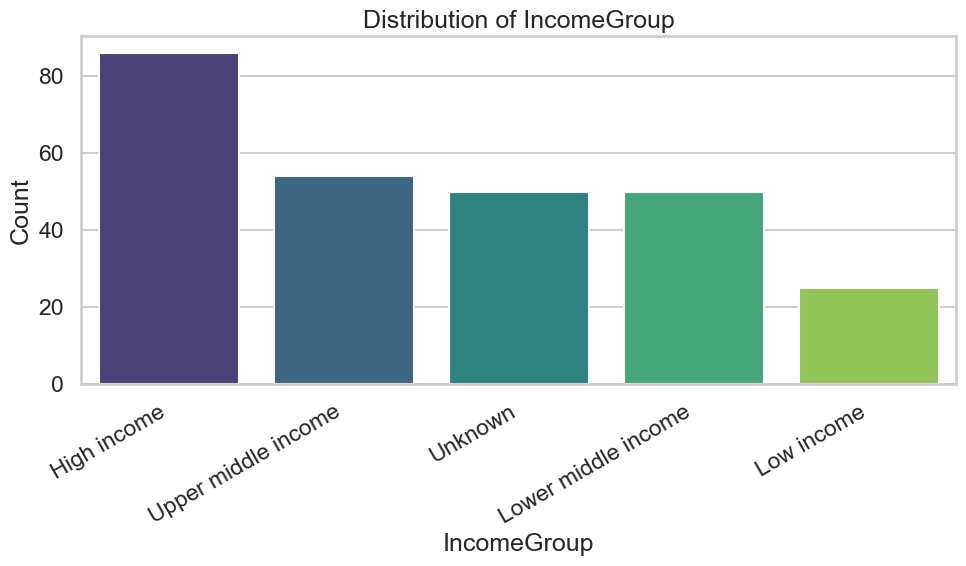

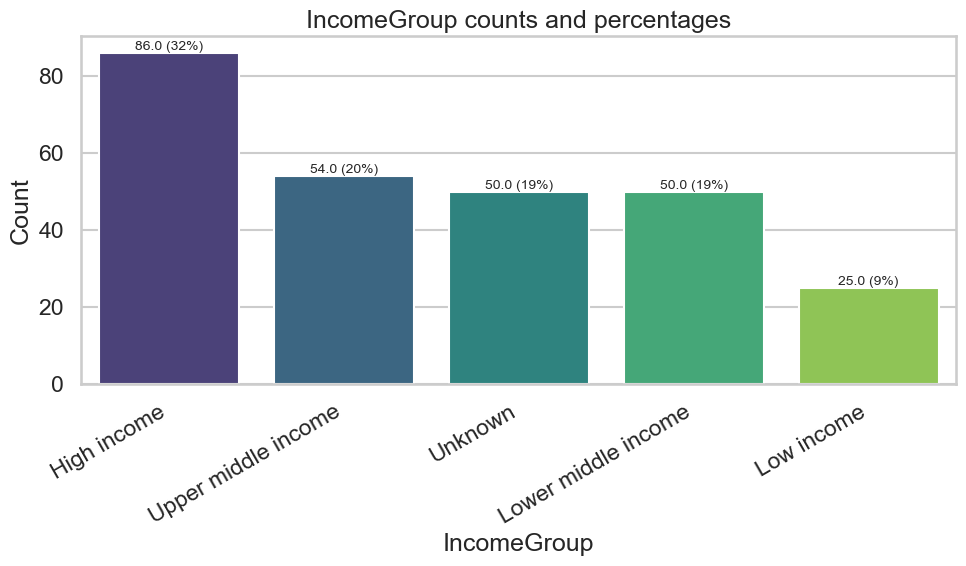

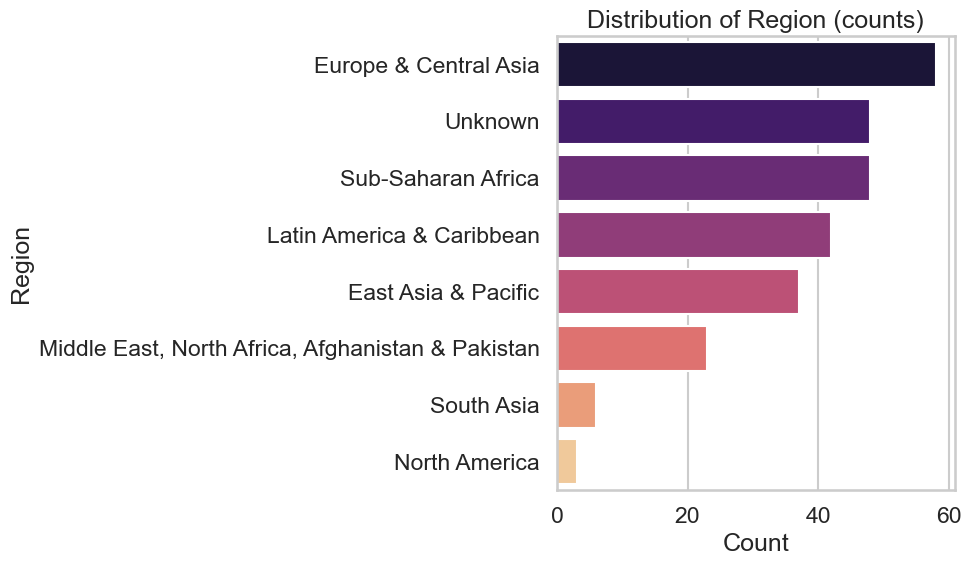

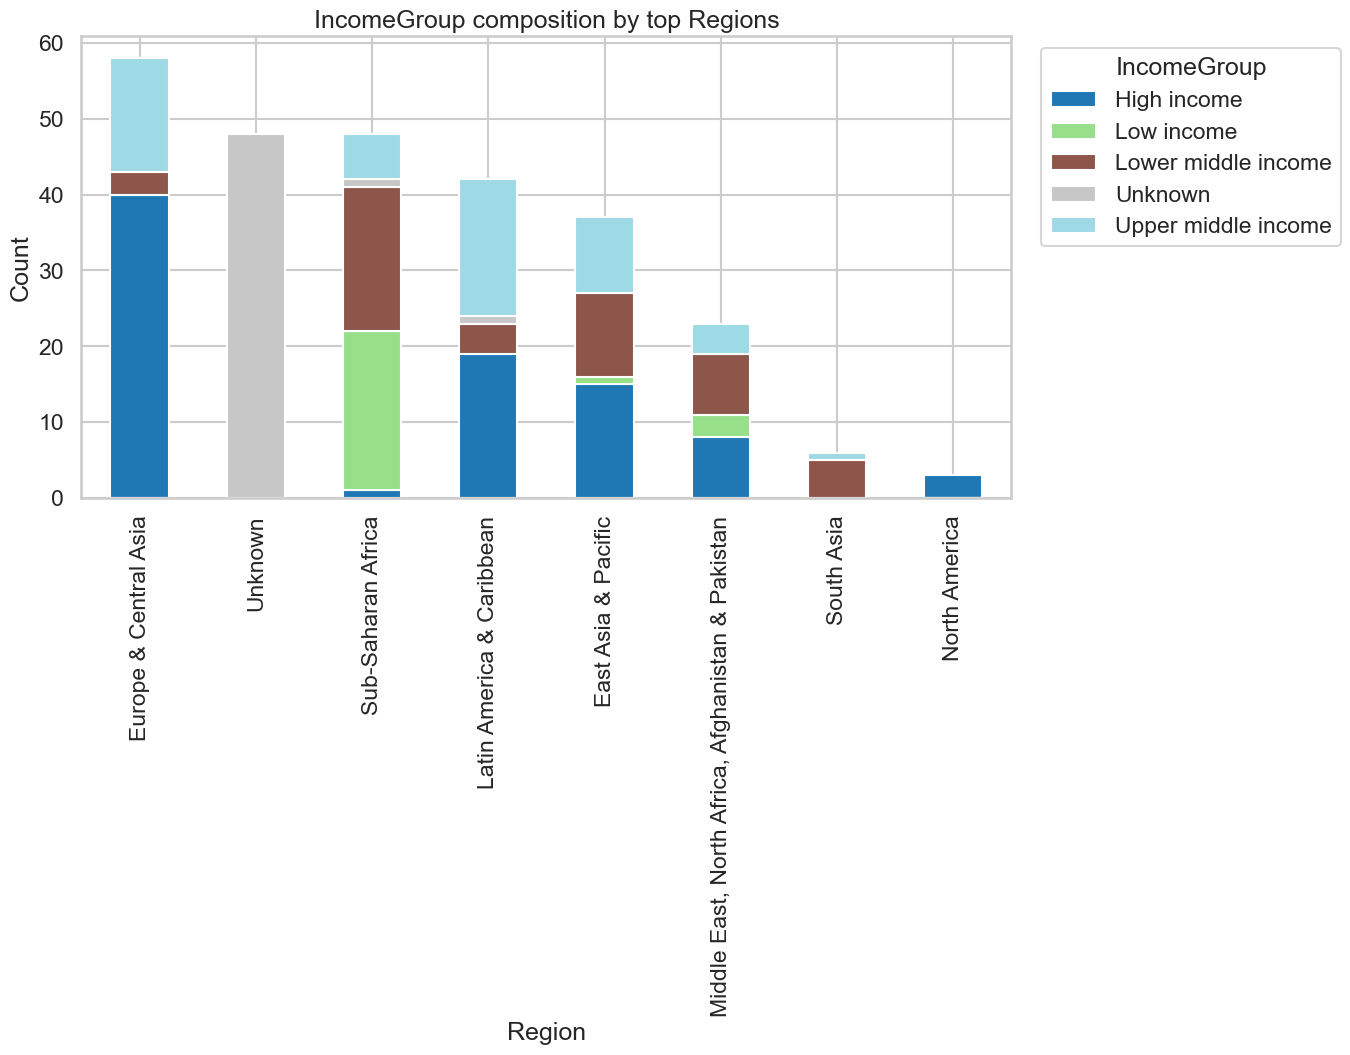

In [13]:
# country_distribution_visuals.py
# Python 3.8+ script to load a CSV with columns like:
# "Country Code", "Region", "IncomeGroup", (optional) "Age", (optional) "Gender"
# and create bar charts (categorical) and histograms (continuous).
# Usage: edit `DATA_PATH` to point to your CSV (local path or raw URL), then run.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (10, 6)

# ====== CONFIG ======
# Change this to your file path or raw GitHub URL (raw.githubusercontent.com/.../file.csv)
DATA_PATH = "https://raw.githubusercontent.com/Prodigy-InfoTech/data-science-datasets/refs/heads/main/Task%201/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv"
# Output folder for charts (will be created if missing)
OUT_DIR = "plots"
# ====================

import os
os.makedirs(OUT_DIR, exist_ok=True)

# 1) Load data robustly with detection for common issues
def load_data(path):
    # try pandas default
    try:
        df = pd.read_csv(path)
        return df
    except pd.errors.ParserError:
        # try flexible parsing: assume semicolon or tab
        for sep in [",", ";", "\t", "|"]:
            try:
                df = pd.read_csv(path, sep=sep)
                return df
            except Exception:
                pass
        # fallback: read as raw text and make best-effort CSV
        txt = pd.read_csv(path, engine="python", error_bad_lines=False, warn_bad_lines=True)
        return txt

df = load_data(DATA_PATH)

# Basic cleanup: unify column names and drop fully-empty columns
df.columns = [c.strip() for c in df.columns]
df = df.dropna(axis=1, how="all")

print("Columns detected:", list(df.columns))
print("Rows loaded:", len(df))

# 2) Primary categorical visualization: distribution of IncomeGroup (if available)
if "IncomeGroup" in df.columns:
    counts = df["IncomeGroup"].fillna("Unknown").value_counts()
    order = counts.index.tolist()

    plt.figure()
    sns.barplot(x=counts.index, y=counts.values, order=order, palette="viridis")
    plt.title("Distribution of IncomeGroup")
    plt.xlabel("IncomeGroup")
    plt.ylabel("Count")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    out = os.path.join(OUT_DIR, "incomegroup_distribution.png")
    plt.savefig(out, dpi=200)
    print("Saved:", out)

    # Also show percentage labels on bars
    plt.figure()
    ax = sns.barplot(x=counts.index, y=counts.values, order=order, palette="viridis")
    total = counts.sum()
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f"{height} ({height/total:.0%})",
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, rotation=0)
    plt.title("IncomeGroup counts and percentages")
    plt.xlabel("IncomeGroup")
    plt.ylabel("Count")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    out = os.path.join(OUT_DIR, "incomegroup_counts_pct.png")
    plt.savefig(out, dpi=200)
    print("Saved:", out)
else:
    print("Column 'IncomeGroup' not found. Skipping IncomeGroup chart.")

# 3) Categorical: distribution of Region
if "Region" in df.columns:
    region_counts = df["Region"].fillna("Unknown").value_counts()
    # If many regions, plot top 15 and aggregate rest as Other
    top_n = 15
    if len(region_counts) > top_n:
        top = region_counts.iloc[:top_n]
        others = region_counts.iloc[top_n:].sum()
        top["Other"] = others
        plot_series = top
    else:
        plot_series = region_counts

    plt.figure()
    sns.barplot(x=plot_series.values, y=plot_series.index, palette="magma")
    plt.title("Distribution of Region (counts)")
    plt.xlabel("Count")
    plt.ylabel("Region")
    plt.tight_layout()
    out = os.path.join(OUT_DIR, "region_distribution.png")
    plt.savefig(out, dpi=200)
    print("Saved:", out)
else:
    print("Column 'Region' not found. Skipping Region chart.")

# 4) If there's a Gender column, show counts
if "Gender" in df.columns:
    gender_counts = df["Gender"].fillna("Unknown").value_counts()
    plt.figure()
    sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")
    plt.title("Gender distribution")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.tight_layout()
    out = os.path.join(OUT_DIR, "gender_distribution.png")
    plt.savefig(out, dpi=200)
    print("Saved:", out)

# 5) If there's an Age (continuous) column, show histogram + KDE
if "Age" in df.columns:
    # coerce to numeric and drop NaNs
    age = pd.to_numeric(df["Age"], errors="coerce").dropna()
    if len(age) > 0:
        plt.figure()
        sns.histplot(age, bins=20, kde=True, color="steelblue")
        plt.title("Age distribution")
        plt.xlabel("Age")
        plt.ylabel("Count")
        plt.tight_layout()
        out = os.path.join(OUT_DIR, "age_histogram.png")
        plt.savefig(out, dpi=200)
        print("Saved:", out)

        # summary stats
        print("Age stats: count", age.count(), "mean", round(age.mean(),2), "median", age.median(),
              "std", round(age.std(),2))
    else:
        print("Age column exists but no numeric values found. Skipping Age histogram.")
else:
    print("Column 'Age' not found. Skipping continuous variable histogram.")

# 6) Example: stacked bar of IncomeGroup by Region (if both present)
if "IncomeGroup" in df.columns and "Region" in df.columns:
    pivot = (df.assign(IncomeGroup=df["IncomeGroup"].fillna("Unknown"),
                       Region=df["Region"].fillna("Unknown"))
             .groupby(["Region", "IncomeGroup"]).size()
             .unstack(fill_value=0))
    # keep top regions for readability
    top_regions = pivot.sum(axis=1).sort_values(ascending=False).iloc[:12].index
    pivot_top = pivot.loc[top_regions]
    pivot_top.plot(kind="bar", stacked=True, colormap="tab20", figsize=(12,6))
    plt.title("IncomeGroup composition by top Regions")
    plt.xlabel("Region")
    plt.ylabel("Count")
    plt.legend(title="IncomeGroup", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    out = os.path.join(OUT_DIR, "income_by_region_stacked.png")
    plt.savefig(out, dpi=200)
    print("Saved:", out)
else:
    print("Skipping stacked chart (needs both IncomeGroup and Region).")

print("Done. Check the plots folder for PNG files.")